In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [31]:
df = pd.read_csv('refined_x_y.csv')
df.head()
#df.info()

Unnamed: 0  airpressure     airtemp  specific_humidity  windspeed  \
0           0   84055.0703  274.887909           0.000971   2.769442   
1           1   84247.2344  277.503204           0.001098   2.950434   
2           2   84256.8281  288.390137           0.001060   1.049703   
3           3   84185.4141  288.949371           0.001141   1.993747   
4           4   84141.4141  277.850464           0.001479   1.554527   

  updated_timestamp  avg_rain  
0  12-31-2015 00:00       NaN  
1  12-31-2015 03:00       NaN  
2  12-31-2015 06:00       NaN  
3  12-31-2015 09:00       NaN  
4  12-31-2015 12:00       0.0

In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13420 entries, 0 to 13419
Data columns (total 7 columns):
Unnamed: 0           13420 non-null int64
airpressure          8776 non-null float64
airtemp              8776 non-null float64
specific_humidity    8776 non-null float64
windspeed            8776 non-null float64
updated_timestamp    13420 non-null object
avg_rain             8776 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 734.0+ KB


In [33]:
import seaborn as sns
from sklearn.preprocessing import Imputer
# First create an Imputer , Stratergy means what we want to write in place of missed value
missingValueImputer = Imputer (missing_values = 'NaN', strategy = 'mean', 
                               axis = 0)  #if missing values are represented by 9999 then write same here
# Set which columns imputer should perform
missingValueImputer = missingValueImputer.fit (df[['avg_rain']])
# update values of X with new values
df[['avg_rain']] = missingValueImputer.transform(df[['avg_rain']])




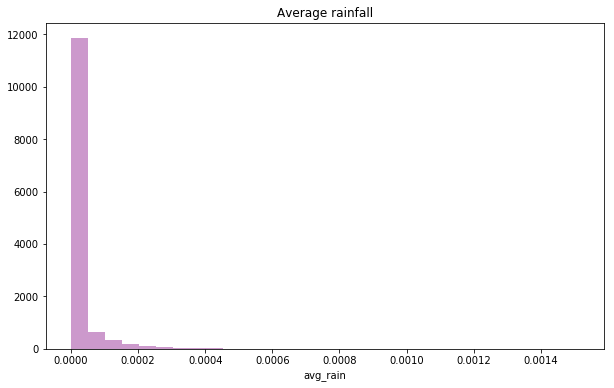

In [34]:

plt.figure(figsize=(10,6))
sns.distplot(df['avg_rain'], kde = False, bins = 30, color = 'purple')  #distplot is distribution plot

plt.title('Average rainfall')
plt.show()

In [35]:
sns.kdeplot(df['avg_rain'], shade=True)#kde (kernel density estimate) can be a useful tool for plotting the shape of a distribution

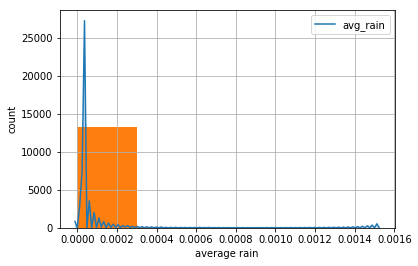

In [36]:
df['avg_rain'].hist(bins=5)
plt.xlabel('average rain')
plt.ylabel('count')
plt.show()

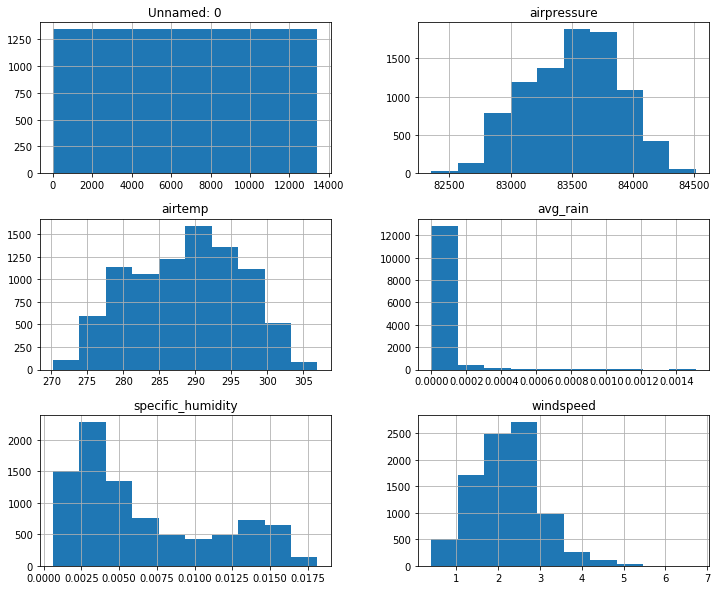

In [37]:

df.hist(figsize=(12,10))
plt.show()

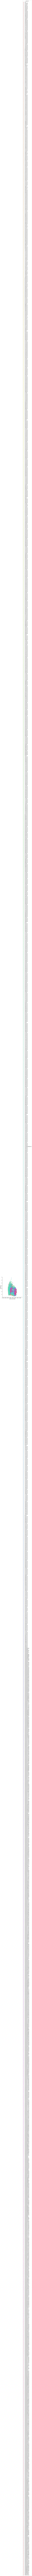

In [38]:
 sns.lmplot('specific_humidity','windspeed', data = df,palette='hls',hue = 'avg_rain',fit_reg=False)
plt.show()

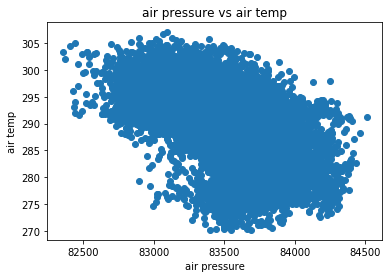

In [39]:
plt.scatter(df['airpressure'], df['airtemp'])
plt.title('air pressure vs air temp')
plt.xlabel('air pressure')
plt.ylabel('air temp')
plt.show()

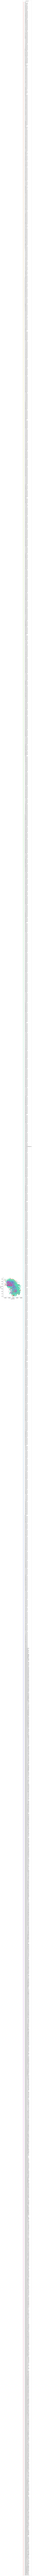

In [40]:
sns.lmplot('airpressure','airtemp', data = df,palette='hls',hue = 'avg_rain',fit_reg=False)
plt.show()

In [42]:
df1 = pd.read_csv('refined_x.csv')
df1.head(2)

df2 = pd.read_csv('refined_y.csv')
df2.head(2)

combined = pd.merge(df1,df, on='updated_timestamp', how='inner')
combined.head(2)



Unnamed: 0_x            timestamp  airpressure_x   airtemp_x  \
0             0  2015-12-31 00:00:00     84055.0703  274.887909   
1             1  2015-12-31 03:00:00     84247.2344  277.503204   

   specific_humidity_x  windspeed_x      time updated_date  hour  min  \
0             0.000971     2.769442  00:00:00   12-31-2015     0    0   
1             0.001098     2.950434  03:00:00   12-31-2015     3    0   

  time_updated updated_timestamp  Unnamed: 0_y  airpressure_y   airtemp_y  \
0        00:00  12-31-2015 00:00             0     84055.0703  274.887909   
1        03:00  12-31-2015 03:00             1     84247.2344  277.503204   

   specific_humidity_y  windspeed_y  avg_rain  
0             0.000971     2.769442  0.000033  
1             0.001098     2.950434  0.000033

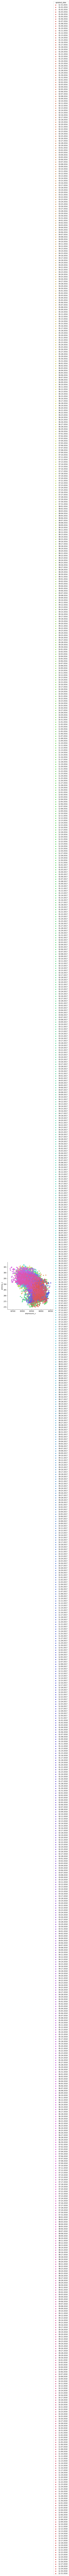

In [43]:
#sns.countplot(combined["updated_date"])
#plt.show()

sns.lmplot('airpressure_x','airtemp_x', data = combined, palette='hls',hue = 'updated_date',fit_reg=False)
plt.show()

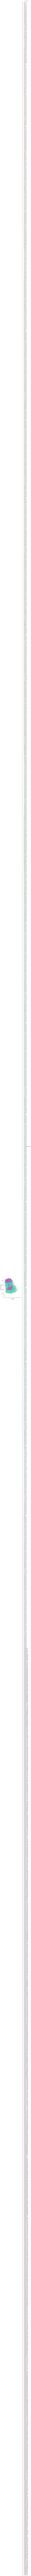

In [44]:

sns.lmplot('windspeed','specific_humidity', data = df, palette='hls',hue = 'avg_rain',fit_reg=False)
plt.show()